In [1]:
! pip install opendatasets
! pip install pandas
! pip install tensorflow
! pip install opencv-python


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import opendatasets as od
import pandas
od.download(
    "https://www.kaggle.com/datasets/alessiocorrado99/animals10?resource=download")

Skipping, found downloaded files in ".\animals10" (use force=True to force download)


In [1]:
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt

# tensorflow
import tensorflow as tf
import tensorflow.keras as keras


In [2]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

IMG_SIZE = (100, 100)
BATCH = 32
EPOCHS = 5
LEARNING_RATE = 0.001

# Define data augmentation strategy
dataset = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    rescale=1.0/255.0,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load training and validation datasets
train_gen = tf.keras.preprocessing.image_dataset_from_directory(
    'C:/Users/mercu/Downloads/animals10/raw-img',
    validation_split=0.2,
    subset='training',
    label_mode='int',  # Use 'int' since your labels are integers
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH
)

val_gen = tf.keras.preprocessing.image_dataset_from_directory(
    'C:/Users/mercu/Downloads/animals10/raw-img',
    validation_split=0.2,
    subset="validation",
    label_mode='int',  # Use 'int' since your labels are integers
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH
)

# Define ResNet50 model with custom head
model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                           input_shape=(100, 100, 3),
                                                           pooling='avg',
                                                           weights='imagenet')

for each_layer in pretrained_model.layers:
    each_layer.trainable = False

model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
                          loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
                          metrics=['accuracy'])

# Train the model
history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=EPOCHS)

Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.
Epoch 1/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 356s 524ms/step - accuracy: 0.6868 - loss: 1.0806 - val_accuracy: 0.7807 - val_loss: 0.6573
Epoch 2/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 327s 499ms/step - accuracy: 0.8155 - loss: 0.5433 - val_accuracy: 0.8019 - val_loss: 0.6030
Epoch 3/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 316s 483ms/step - accuracy: 0.8526 - loss: 0.4206 - val_accuracy: 0.7861 - val_loss: 0.6888
Epoch 4/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 318s 486ms/step - accuracy: 0.8744 - loss: 0.3454 - val_accuracy: 0.8004 - val_loss: 0.6704
Epoch 5/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 346s 529ms/step - accuracy: 0.9060 - loss: 0.2685 - val_accuracy: 0.8099 - val_loss: 0.6925


In [3]:
my_model = 'my_model_path.h5'
model.save(my_model)
print("Model saved successfully at:", my_model)
loaded_model = tf.keras.models.load_model(my_model)

Model saved successfully at: my_model_path.h5


In [4]:
score = model.evaluate(val_gen)
print('Total loss on Testing Set:', score[0])
print('Accuracy of Testing Set:', score[1])

164/164 ━━━━━━━━━━━━━━━━━━━━ 75s 457ms/step - accuracy: 0.8166 - loss: 0.6874
Total loss on Testing Set: 0.6925439834594727
Accuracy of Testing Set: 0.8099331259727478


In [5]:
proba = model.predict(val_gen)
proba.round(2)

164/164 ━━━━━━━━━━━━━━━━━━━━ 72s 427ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.03, 0.  , 0.  , ..., 0.95, 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.05, 0.09, 0.  , ..., 0.08, 0.  , 0.  ],
       [0.04, 0.31, 0.02, ..., 0.29, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [6]:
pred = np.argmax(model.predict(val_gen), axis=-1)

164/164 ━━━━━━━━━━━━━━━━━━━━ 84s 511ms/step


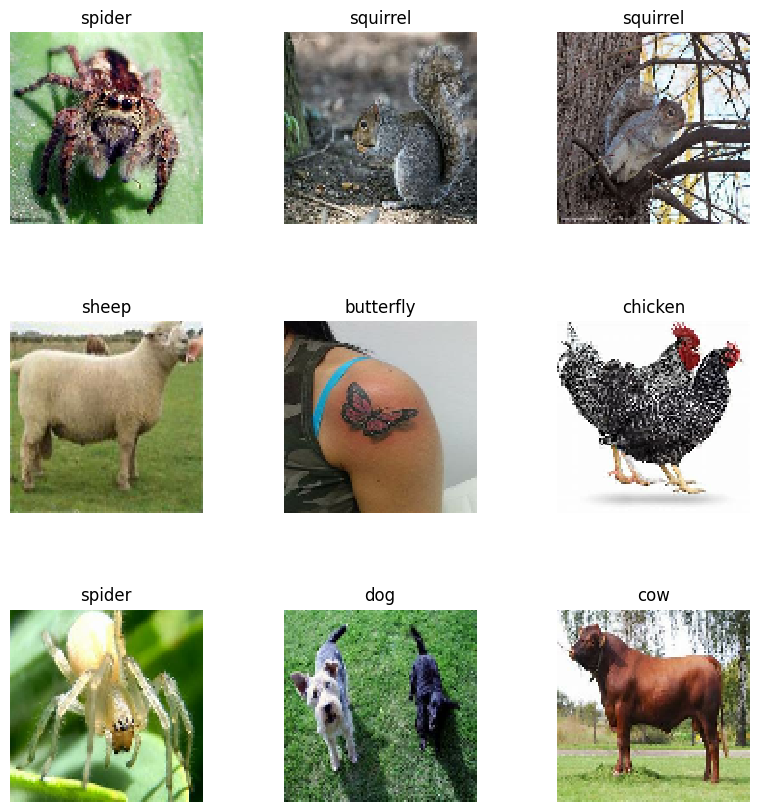

In [7]:
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "ragno": "spider", "scoiattolo": "squirrel"}
classes=train_gen.class_names
plt.figure(figsize=(10,10), dpi=100)
for images,labels in train_gen.take(1):
    for n in  range(9):
        ax=plt.subplot(3,3,n+1)
        plt.imshow(images[n].numpy().astype('uint8'), cmap="binary", interpolation="nearest")
        translated_label = translate[classes[labels[n]]]
        plt.title(translated_label, fontsize=12)
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

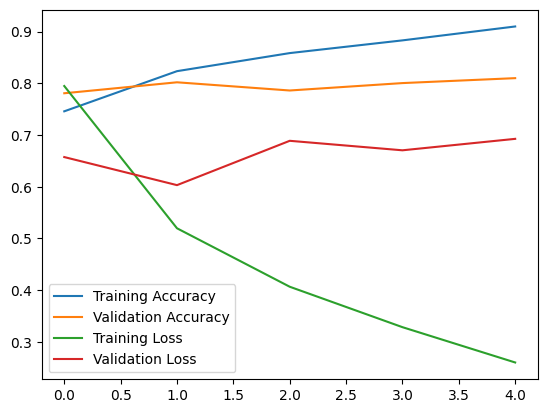

In [8]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()